In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [92]:
import pandas as pd

import re

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/My Drive/Data/ExtractedTweets.csv')

In [4]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [5]:
df.describe()

,Party,Handle,Tweet
count,86460,86460,86460
unique,2,433,84502
top,Republican,RepGuthrie,"RT @RepDanKildee: Four years later, Flint fami..."
freq,44392,200,31


In [6]:
df.shape

(86460, 3)

In [7]:
tweets = df.Tweet.values

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
stopwords = stopwords.words('english')
stopwords.append("rt")

In [10]:
Tweet_list = []
for Tweet in tweets :
  Tweet= re.sub(r"https:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", "",Tweet)
  #remove links
  Tweet =re.sub("[^a-zA-Z]"," ",Tweet)
  Tweet =re.sub("[\s.]+\s$"," ",Tweet)
  #remove all characters except letters
  Tweet = Tweet.lower()
  Tweet = nltk.word_tokenize(Tweet)
  Tweet = [word for word in Tweet if not word in set(stopwords)]
  lemma = nltk.WordNetLemmatizer()
  Tweet = [lemma.lemmatize(word) for word in Tweet]
  Tweet = " ".join(Tweet)
  Tweet_list.append(Tweet)

In [11]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [12]:
df.head(10).Tweet

0    Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L   
1    RT @WinterHavenSun: Winter Haven resident / Alta Vista teacher is one of several recognized by @RepDarrenSoto for National Teacher Apprecia…  
2    RT @NBCLatino: .@RepDarrenSoto noted that Hurricane Maria has left approximately $90 billion in damages. \n\nCongress has allocated about $18…
3    RT @NALCABPolicy: Meeting with @RepDarrenSoto . Thanks for taking the time to meet with @LatinoLeader ED Marucci Guzman. #NALCABPolicy2018.…  
4    RT @Vegalteno: Hurricane season starts on June 1st; Puerto Rico’s readiness...well 🤦🏼‍♂️😡😩@Pwr4PuertoRico @RepDarrenSoto @EspaillatNY         
5    RT @EmgageActionFL: Thank you to all who came out to our Orlando gala! It was a successful night that would not have been possible without…   
6    Hurricane Maria left approx $90 billion in damages, yet only $1 billion was allocated for rebuilding grid. 

In [13]:
Tweet_list[0:10]

['today senate dems vote savetheinternet proud support similar netneutrality legislation house',
 'winterhavensun winter resident alta vista teacher one several recognized repdarrensoto national teacher apprecia',
 'nbclatino repdarrensoto noted hurricane maria left approximately billion damage congress allocated',
 'nalcabpolicy meeting repdarrensoto thanks taking time meet latinoleader ed marucci guzman nalcabpolicy',
 'vegalteno hurricane season start june st puerto rico readiness well pwr puertorico repdarrensoto espaillatny',
 'emgageactionfl thank came orlando gala successful night would possible without',
 'hurricane maria left approx billion damage yet billion allocated rebuilding grid surpr',
 'tharryry delighted repdarrensoto voting cra overrule fcc save netneutrality rule find',
 'hispaniccaucus trump anti immigrant policy hurting small business across country find american willing',
 'repstephmurphy great joining weareunidosus repdarrensoto roundtable orlando federal issue 

In [14]:
len(Tweet_list)

86460

In [15]:
df["Tweets"] = Tweet_list

In [16]:
df.head(3)

,Party,Handle,Tweet,Tweets
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L",today senate dems vote savetheinternet proud support similar netneutrality legislation house
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Alta Vista teacher is one of several recognized by @RepDarrenSoto for National Teacher Apprecia…,winterhavensun winter resident alta vista teacher one several recognized repdarrensoto national teacher apprecia
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurricane Maria has left approximately $90 billion in damages. \n\nCongress has allocated about $18…,nbclatino repdarrensoto noted hurricane maria left approximately billion damage congress allocated


In [17]:
df=df.drop(['Tweet'],axis=1)

In [18]:
df.head(3)

,Party,Handle,Tweets
0,Democrat,RepDarrenSoto,today senate dems vote savetheinternet proud support similar netneutrality legislation house
1,Democrat,RepDarrenSoto,winterhavensun winter resident alta vista teacher one several recognized repdarrensoto national teacher apprecia
2,Democrat,RepDarrenSoto,nbclatino repdarrensoto noted hurricane maria left approximately billion damage congress allocated


In [19]:
democrat=df[df.Party=="Democrat"]
republican=df[df.Party=="Republican"]

In [20]:
democrat.head(2)

,Party,Handle,Tweets
0,Democrat,RepDarrenSoto,today senate dems vote savetheinternet proud support similar netneutrality legislation house
1,Democrat,RepDarrenSoto,winterhavensun winter resident alta vista teacher one several recognized repdarrensoto national teacher apprecia


In [21]:
republican.head(2)

,Party,Handle,Tweets
42068,Republican,RepRalphNorman,wastefulwednesday today introduced bill would eliminate global climate change initiative gc
42069,Republican,RepRalphNorman,today honored heroic men amp woman law enforcement lost life line duty nati


In [22]:
print(len(democrat))
print(len(republican))

42068
44392


In [23]:
d_tweets = republican.Tweets.values
r_tweets = democrat.Tweets.values

In [24]:
d_tweets=d_tweets.tolist()
r_tweets=r_tweets.tolist()

In [25]:
d_tweets[0:3]

['wastefulwednesday today introduced bill would eliminate global climate change initiative gc',
 'today honored heroic men amp woman law enforcement lost life line duty nati',
 'congressmanraja last week repralphnorman hosted briefing economic benefit solar energy production']

In [26]:
r_tweets[0:3]

['today senate dems vote savetheinternet proud support similar netneutrality legislation house',
 'winterhavensun winter resident alta vista teacher one several recognized repdarrensoto national teacher apprecia',
 'nbclatino repdarrensoto noted hurricane maria left approximately billion damage congress allocated']

In [27]:
democrat_words=str(d_tweets).split()
republican_words=str(r_tweets).split()

In [28]:
print(len(democrat_words))
print(len(republican_words))

470337
453639


In [29]:
democrat_words[0:3]

["['wastefulwednesday", 'today', 'introduced']

In [30]:
democrat_words[-1]

"together']"

In [31]:
republican_words[0:3]

["['today", 'senate', 'dems']

In [32]:
democrat_words[0]=democrat_words[0][2:]

In [33]:
democrat_words[0]

'wastefulwednesday'

In [34]:
democrat_words[-1]=democrat_words[-1][:-2]

In [35]:
republican_words[0]=republican_words[0][2:]

In [36]:
republican_words[-1]=republican_words[-1][:-2]

In [37]:
from nltk.probability import FreqDist
fdist_democrat_words = FreqDist(democrat_words)
fdist_republican_words=FreqDist(republican_words)

In [38]:
fdist_democrat_words.most_common(20)

[('amp', 4641),
 ('today', 3186),
 ('tax', 2629),
 ('u', 2178),
 ('bill', 2080),
 ('house', 2012),
 ('american', 1987),
 ('year', 1675),
 ('day', 1638),
 ('act', 1569),
 ('great', 1451),
 ("'today", 1395),
 ("'great", 1381),
 ('hearing', 1346),
 ('family', 1302),
 ('work', 1296),
 ('new', 1294),
 ('job', 1291),
 ('week', 1280),
 ('thank', 1274)]

In [39]:
fdist_republican_words.most_common(20)

[('amp', 4659),
 ('today', 2449),
 ('trump', 2040),
 ('u', 1859),
 ('american', 1785),
 ('year', 1493),
 ('student', 1482),
 ('family', 1480),
 ('woman', 1363),
 ('day', 1338),
 ('house', 1338),
 ('people', 1296),
 ('congress', 1290),
 ('bill', 1276),
 ('work', 1268),
 ('time', 1266),
 ('new', 1238),
 ("'today", 1196),
 ('president', 1167),
 ('tax', 1141)]

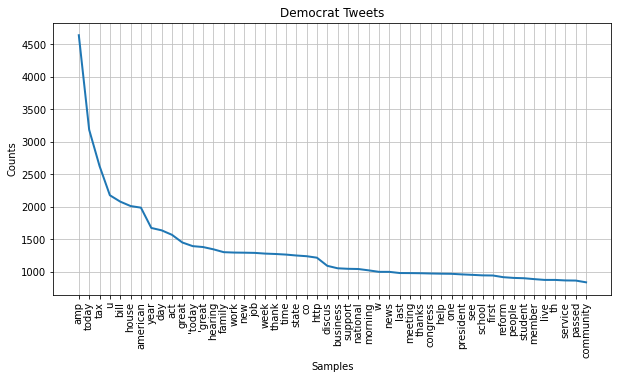

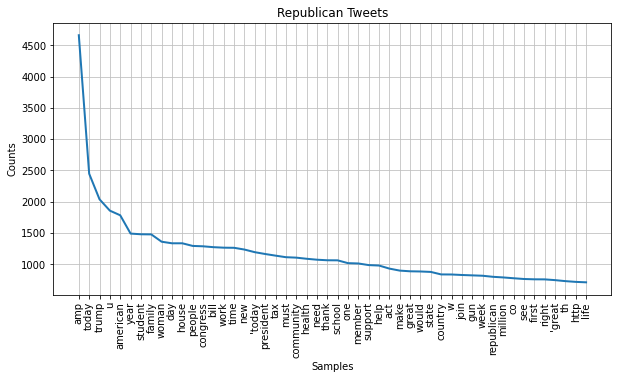

In [40]:
plt.subplots(figsize=(10,5))
fdist_democrat_words.plot(50,title="Democrat Tweets")
plt.subplots(figsize=(10,5))
fdist_republican_words.plot(50,title="Republican Tweets")

In [41]:
r_50 = fdist_republican_words.most_common(50)
d_50 = fdist_democrat_words.most_common(50)

In [42]:
r_top=[]
for i in r_50:
  r_top.append(i[0])

In [43]:
d_top=[]
for i in d_50:
  d_top.append(i[0])

In [44]:
r_only= set(r_top)-set(d_top)

In [45]:
r_only

{'country',
 'gun',
 'health',
 'join',
 'life',
 'make',
 'million',
 'must',
 'need',
 'republican',
 'right',
 'trump',
 'woman',
 'would'}

In [46]:
d_only= set(d_top)-set(r_top)

In [47]:
d_only

{'business',
 'discus',
 'hearing',
 'job',
 'last',
 'live',
 'meeting',
 'morning',
 'national',
 'news',
 'passed',
 'reform',
 'service',
 'thanks'}

In [48]:
print(set(r_top)&set(d_top))

{'w', 'time', 'day', "'today", 'first', 'see', 'th', 'u', 'week', 'congress', 'http', 'year', 'amp', 'work', 'tax', 'student', 'support', 'co', 'state', 'american', 'act', 'community', 'bill', 'one', 'thank', "'great", 'school', 'today', 'help', 'member', 'house', 'family', 'great', 'people', 'new', 'president'}


In [49]:
remove =['co','u','w','th','amp','http']

In [50]:
top_common = (set(r_top)&set(d_top))-set(remove)

In [51]:
top_common

{"'great",
 "'today",
 'act',
 'american',
 'bill',
 'community',
 'congress',
 'day',
 'family',
 'first',
 'great',
 'help',
 'house',
 'member',
 'new',
 'one',
 'people',
 'president',
 'school',
 'see',
 'state',
 'student',
 'support',
 'tax',
 'thank',
 'time',
 'today',
 'week',
 'work',
 'year'}

#Machine Learning Models

In [52]:
df['Class'] = df['Party'].map({'Democrat':0, 'Republican':1})
df.tail()

,Party,Handle,Tweets,Class
86455,Republican,RepTomPrice,check op ed need end executive overreach act white house crippling economy via dcexaminer,1
86456,Republican,RepTomPrice,yesterday betty amp great time learning forestry industry employ approx people ga,1
86457,Republican,RepTomPrice,forever grateful service sacrifice major barney,1
86458,Republican,RepTomPrice,happy first day school cobbschools cobbbacktoschool,1
86459,Republican,RepTomPrice,zika fear realized florida house gop acted prevent crisis dems inaction inexcusable time put politics aside amp work together,1


In [53]:
df.head()

,Party,Handle,Tweets,Class
0,Democrat,RepDarrenSoto,today senate dems vote savetheinternet proud support similar netneutrality legislation house,0
1,Democrat,RepDarrenSoto,winterhavensun winter resident alta vista teacher one several recognized repdarrensoto national teacher apprecia,0
2,Democrat,RepDarrenSoto,nbclatino repdarrensoto noted hurricane maria left approximately billion damage congress allocated,0
3,Democrat,RepDarrenSoto,nalcabpolicy meeting repdarrensoto thanks taking time meet latinoleader ed marucci guzman nalcabpolicy,0
4,Democrat,RepDarrenSoto,vegalteno hurricane season start june st puerto rico readiness well pwr puertorico repdarrensoto espaillatny,0


In [54]:
df.head(5)

,Party,Handle,Tweets,Class
0,Democrat,RepDarrenSoto,today senate dems vote savetheinternet proud support similar netneutrality legislation house,0
1,Democrat,RepDarrenSoto,winterhavensun winter resident alta vista teacher one several recognized repdarrensoto national teacher apprecia,0
2,Democrat,RepDarrenSoto,nbclatino repdarrensoto noted hurricane maria left approximately billion damage congress allocated,0
3,Democrat,RepDarrenSoto,nalcabpolicy meeting repdarrensoto thanks taking time meet latinoleader ed marucci guzman nalcabpolicy,0
4,Democrat,RepDarrenSoto,vegalteno hurricane season start june st puerto rico readiness well pwr puertorico repdarrensoto espaillatny,0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
tweeters = df.iloc[:,:2].drop_duplicates()
handles_train, handles_test = train_test_split(tweeters.Handle, stratify=tweeters.Party, test_size=0.2, random_state=0)

# extract train & test sets from the all_tweets df
train = df[df.Handle.isin(handles_train)].reset_index().drop('index', axis=1)
test  = df[df.Handle.isin(handles_test)].reset_index().drop('index', axis=1)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import TweetTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
tokenizer = TweetTokenizer(reduce_len=True)

In [58]:
nb_pipeline = Pipeline([
    ('vectorize', TfidfVectorizer(tokenizer=tokenizer.tokenize)),
    ('classifier', MultinomialNB())
])
nb_pipeline.fit(train.Tweets, train.Class)
preds = nb_pipeline.predict(test.Tweets)
print('Accuracy: {}'.format(str(round(accuracy_score(test.Class, preds), 4))))

Accuracy: 0.7467


In [59]:
accuracy_df = test.drop(['Tweets'], axis=1)
accuracy_df['preds'] = preds
correct = 0
total = 0
print("Congresspersons whose tweets were mostly mis-classified:")
for name in accuracy_df.Handle.unique():
    sub_df = accuracy_df[accuracy_df.Handle == name].reset_index()
    sub_preds = sub_df.preds.value_counts()
    if sub_preds.index[0] == sub_df.Class[0]:
        correct += 1
    total += 1
    if sub_preds[sub_df.Class[0]]/len(sub_df) < 0.5:
        print("{} ({}) classified with accuracy: {}".format(name, sub_df.Class[0],str(round(sub_preds[sub_df.Class[0]]/len(sub_df), 4))))
print()
print("Accuracy of the model on a per-Congressperson-basis was: {}".format(str(round(correct/total, 4))))

Congresspersons whose tweets were mostly mis-classified:
RepVisclosky (0) classified with accuracy: 0.2589
RepCurbelo (1) classified with accuracy: 0.49
DanaRohrabacher (1) classified with accuracy: 0.407

Accuracy of the model on a per-Congressperson-basis was: 0.9655


In [60]:

from sklearn.tree import DecisionTreeClassifier
nb_pipeline = Pipeline([
    ('vectorize', TfidfVectorizer(tokenizer=tokenizer.tokenize)),
    ('classifier', DecisionTreeClassifier(random_state = 42))
])
nb_pipeline.fit(train.Tweets, train.Class)
preds = nb_pipeline.predict(test.Tweets)
print('Accuracy: {}'.format(str(round(accuracy_score(test.Class, preds), 4))))

Accuracy: 0.6438


In [61]:
accuracy_df = test.drop(['Tweets'], axis=1)
accuracy_df['preds'] = preds
correct = 0
total = 0
print("Congresspersons whose tweets were mostly mis-classified:")
for name in accuracy_df.Handle.unique():
    sub_df = accuracy_df[accuracy_df.Handle == name].reset_index()
    sub_preds = sub_df.preds.value_counts()
    if sub_preds.index[0] == sub_df.Class[0]:
        correct += 1
    total += 1
    if sub_preds[sub_df.Class[0]]/len(sub_df) < 0.5:
        print("{} ({}) classified with accuracy: {}".format(name, sub_df.Class[0],str(round(sub_preds[sub_df.Class[0]]/len(sub_df), 4))))
print()
print("Accuracy of the model on a per-Congressperson-basis was: {}".format(str(round(correct/total, 4))))

Congresspersons whose tweets were mostly mis-classified:
USRepRickNolan (0) classified with accuracy: 0.495
JohnCarneyDE (0) classified with accuracy: 0.485
RepVisclosky (0) classified with accuracy: 0.4213
RepBrady (0) classified with accuracy: 0.49
RepJimMcDermott (0) classified with accuracy: 0.395
RepSchrader (0) classified with accuracy: 0.495
RepCurbelo (1) classified with accuracy: 0.45
DanaRohrabacher (1) classified with accuracy: 0.3769

Accuracy of the model on a per-Congressperson-basis was: 0.908


In [62]:
from sklearn.neighbors import KNeighborsClassifier
nb_pipeline = Pipeline([
    ('vectorize', TfidfVectorizer(tokenizer=tokenizer.tokenize)),
    ('classifier', KNeighborsClassifier(n_neighbors = 40))
])
nb_pipeline.fit(train.Tweets, train.Class)
preds = nb_pipeline.predict(test.Tweets)
print('Accuracy: {}'.format(str(round(accuracy_score(test.Class, preds), 4))))

Accuracy: 0.5244


In [63]:
accuracy_df = test.drop(['Tweets'], axis=1)
accuracy_df['preds'] = preds
correct = 0
total = 0
print("Congresspersons whose tweets were mostly mis-classified:")
for name in accuracy_df.Handle.unique():
    sub_df = accuracy_df[accuracy_df.Handle == name].reset_index()
    sub_preds = sub_df.preds.value_counts()
    if sub_preds.index[0] == sub_df.Class[0]:
        correct += 1
    total += 1
    if sub_preds[sub_df.Class[0]]/len(sub_df) < 0.5:
        print("{} ({}) classified with accuracy: {}".format(name, sub_df.Class[0],str(round(sub_preds[sub_df.Class[0]]/len(sub_df), 4))))
print()
print("Accuracy of the model on a per-Congressperson-basis was: {}".format(str(round(correct/total, 4))))

Congresspersons whose tweets were mostly mis-classified:
RepMcEachin (0) classified with accuracy: 0.245
DonaldNorcross (0) classified with accuracy: 0.275
RepKathleenRice (0) classified with accuracy: 0.24
RepRubenGallego (0) classified with accuracy: 0.195
RepLawrence (0) classified with accuracy: 0.28
USRepKCastor (0) classified with accuracy: 0.225
AnthonyBrownMD4 (0) classified with accuracy: 0.17
RepScottPeters (0) classified with accuracy: 0.21
RepHuffman (0) classified with accuracy: 0.235
USRepRickNolan (0) classified with accuracy: 0.265
RepMarkTakano (0) classified with accuracy: 0.21
RepDelBene (0) classified with accuracy: 0.245
RepCummings (0) classified with accuracy: 0.21
LacyClayMO1 (0) classified with accuracy: 0.215
RepBonamici (0) classified with accuracy: 0.235
BettyMcCollum04 (0) classified with accuracy: 0.26
RepCicilline (0) classified with accuracy: 0.255
RepRichardNeal (0) classified with accuracy: 0.265
Call_Me_Dutch (0) classified with accuracy: 0.24
RepZoeL

In [64]:
from sklearn.ensemble import AdaBoostClassifier
nb_pipeline = Pipeline([
    ('vectorize', TfidfVectorizer(tokenizer=tokenizer.tokenize)),
    ('classifier', AdaBoostClassifier(n_estimators = 100))
])
nb_pipeline.fit(train.Tweets, train.Class)
preds = nb_pipeline.predict(test.Tweets)
print('Accuracy: {}'.format(str(round(accuracy_score(test.Class, preds), 4))))

Accuracy: 0.6077


In [65]:
accuracy_df = test.drop(['Tweets'], axis=1)
accuracy_df['preds'] = preds
correct = 0
total = 0
print("Congresspersons whose tweets were mostly mis-classified:")
for name in accuracy_df.Handle.unique():
    sub_df = accuracy_df[accuracy_df.Handle == name].reset_index()
    sub_preds = sub_df.preds.value_counts()
    if sub_preds.index[0] == sub_df.Class[0]:
        correct += 1
    total += 1
    if sub_preds[sub_df.Class[0]]/len(sub_df) < 0.5:
        print("{} ({}) classified with accuracy: {}".format(name, sub_df.Class[0],str(round(sub_preds[sub_df.Class[0]]/len(sub_df), 4))))
print()
print("Accuracy of the model on a per-Congressperson-basis was: {}".format(str(round(correct/total, 4))))

Congresspersons whose tweets were mostly mis-classified:
RepArrington (1) classified with accuracy: 0.31
RepJimBanks (1) classified with accuracy: 0.32
RepBrianMast (1) classified with accuracy: 0.33
RepTomMacArthur (1) classified with accuracy: 0.285
RepStefanik (1) classified with accuracy: 0.335
RepRyanCostello (1) classified with accuracy: 0.27
RepRyanZinke (1) classified with accuracy: 0.395
RepPoliquin (1) classified with accuracy: 0.34
RepTomEmmer (1) classified with accuracy: 0.37
repdavetrott (1) classified with accuracy: 0.44
USRepGaryPalmer (1) classified with accuracy: 0.45
RepCurbelo (1) classified with accuracy: 0.175
RepLeeZeldin (1) classified with accuracy: 0.27
RepJasonSmith (1) classified with accuracy: 0.38
USRepLong (1) classified with accuracy: 0.475
RepJBridenstine (1) classified with accuracy: 0.38
RepTedYoho (1) classified with accuracy: 0.495
reppittenger (1) classified with accuracy: 0.49
RepKevinYoder (1) classified with accuracy: 0.275
RepEdRoyce (1) classi

In [66]:
from sklearn.ensemble import RandomForestClassifier
nb_pipeline = Pipeline([
    ('vectorize', TfidfVectorizer(tokenizer=tokenizer.tokenize)),
    ('classifier', RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 37))
])
nb_pipeline.fit(train.Tweets, train.Class)
preds = nb_pipeline.predict(test.Tweets)
print('Accuracy: {}'.format(str(round(accuracy_score(test.Class, preds), 4))))

Accuracy: 0.6769


In [67]:
accuracy_df = test.drop(['Tweets'], axis=1)
accuracy_df['preds'] = preds
correct = 0
total = 0
print("Congresspersons whose tweets were mostly mis-classified:")
for name in accuracy_df.Handle.unique():
    sub_df = accuracy_df[accuracy_df.Handle == name].reset_index()
    sub_preds = sub_df.preds.value_counts()
    if sub_preds.index[0] == sub_df.Class[0]:
        correct += 1
    total += 1
    if sub_preds[sub_df.Class[0]]/len(sub_df) < 0.5:
        print("{} ({}) classified with accuracy: {}".format(name, sub_df.Class[0],str(round(sub_preds[sub_df.Class[0]]/len(sub_df), 4))))
print()
print("Accuracy of the model on a per-Congressperson-basis was: {}".format(str(round(correct/total, 4))))

Congresspersons whose tweets were mostly mis-classified:
RepVisclosky (0) classified with accuracy: 0.467
RepSchrader (0) classified with accuracy: 0.49
RepCurbelo (1) classified with accuracy: 0.405
DanaRohrabacher (1) classified with accuracy: 0.2412

Accuracy of the model on a per-Congressperson-basis was: 0.954


In [68]:
t_tweets = df.Tweets.values
t_tweets = t_tweets.tolist()
t_words = str(t_tweets).split()
from nltk.probability import FreqDist
t_words_list = FreqDist(democrat_words)

In [69]:
x = t_words_list.most_common(45340)

In [70]:
for i in range(45340):
  if x[i][1]<100:
    print(i)
    break;
N_words = i

836


In [71]:
corpus = df.Tweets
vectorizer = TfidfVectorizer(max_features=N_words)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(86460, 836)


In [72]:
type(X)

scipy.sparse.csr.csr_matrix

In [73]:
X =X.toarray()

In [74]:
y = df.Class
print(y.shape)

(86460,)


In [75]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()

model.add(Embedding(N_words+1,128))
model.add(LSTM(8))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         107136    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 4384      
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 111,601
Trainable params: 111,601
Non-trainable params: 0
_________________________________________________________________


In [77]:
import numpy as np


In [78]:
rand_perm=np.random.permutation(len(y))
history = model.fit(X[rand_perm,:], y[rand_perm],epochs=10,batch_size=128,validation_split=.2)

Epoch 1/10
541/541 [==============================] - 43s 65ms/step - loss: 0.6930 - acc: 0.5105 - val_loss: 0.6928 - val_acc: 0.5136
Epoch 2/10
541/541 [==============================] - 34s 63ms/step - loss: 0.6928 - acc: 0.5139 - val_loss: 0.6928 - val_acc: 0.5136
Epoch 3/10
541/541 [==============================] - 34s 64ms/step - loss: 0.6927 - acc: 0.5151 - val_loss: 0.6928 - val_acc: 0.5136
Epoch 4/10
541/541 [==============================] - 35s 64ms/step - loss: 0.6929 - acc: 0.5112 - val_loss: 0.6928 - val_acc: 0.5136
Epoch 5/10
541/541 [==============================] - 35s 64ms/step - loss: 0.6927 - acc: 0.5150 - val_loss: 0.6928 - val_acc: 0.5136
Epoch 6/10
541/541 [==============================] - 34s 63ms/step - loss: 0.6929 - acc: 0.5113 - val_loss: 0.6928 - val_acc: 0.5136
Epoch 7/10
541/541 [==============================] - 35s 65ms/step - loss: 0.6929 - acc: 0.5114 - val_loss: 0.6928 - val_acc: 0.5136
Epoch 8/10
541/541 [==============================] - 35s 65ms

Approach Not working due to Large number of Features

In [79]:
top_words = 10000  # We'll keep these many distinct tokens and drop less frequent ones
# Tokenize using the TweetTokenizer
df.Tweets = df.Tweets.apply(tokenizer.tokenize)
# Get the word counts
fdist = FreqDist(word for tweet in df.Tweets for word in tweet)
# Get top top_words terms, in order of frequency
terms = [term for term, count in fdist.most_common(top_words)]
# Replace all tokens with their rank (or 0 if not in the top top_words)
df['tokens'] = df.Tweets.apply(lambda tweet: [terms.index(term) if term in terms else 0 for term in tweet])

In [80]:
df.head(10)

,Party,Handle,Tweets,Class,tokens
0,Democrat,RepDarrenSoto,"[today, senate, dems, vote, savetheinternet, proud, support, similar, netneutrality, legislation, house]",0,"[1, 145, 856, 71, 2541, 32, 31, 2643, 562, 96, 7]"
1,Democrat,RepDarrenSoto,"[winterhavensun, winter, resident, alta, vista, teacher, one, several, recognized, repdarrensoto, national, teacher, apprecia]",0,"[0, 1719, 406, 0, 4463, 244, 27, 822, 1126, 1558, 43, 244, 0]"
2,Democrat,RepDarrenSoto,"[nbclatino, repdarrensoto, noted, hurricane, maria, left, approximately, billion, damage, congress, allocated]",0,"[8671, 1558, 7610, 634, 2297, 694, 4728, 269, 1204, 18, 9354]"
3,Democrat,RepDarrenSoto,"[nalcabpolicy, meeting, repdarrensoto, thanks, taking, time, meet, latinoleader, ed, marucci, guzman, nalcabpolicy]",0,"[0, 49, 1558, 26, 266, 13, 125, 0, 457, 0, 0, 0]"
4,Democrat,RepDarrenSoto,"[vegalteno, hurricane, season, start, june, st, puerto, rico, readiness, well, pwr, puertorico, repdarrensoto, espaillatny]",0,"[0, 634, 809, 310, 2021, 173, 849, 973, 1633, 306, 0, 1168, 1558, 0]"
5,Democrat,RepDarrenSoto,"[emgageactionfl, thank, came, orlando, gala, successful, night, would, possible, without]",0,"[0, 6, 554, 2022, 3047, 1276, 188, 72, 1127, 407]"
6,Democrat,RepDarrenSoto,"[hurricane, maria, left, approx, billion, damage, yet, billion, allocated, rebuilding, grid, surpr]",0,"[634, 2297, 694, 6212, 269, 1204, 472, 269, 9354, 1949, 4464, 0]"
7,Democrat,RepDarrenSoto,"[tharryry, delighted, repdarrensoto, voting, cra, overrule, fcc, save, netneutrality, rule, find]",0,"[0, 2772, 1558, 495, 4323, 0, 716, 514, 562, 280, 254]"
8,Democrat,RepDarrenSoto,"[hispaniccaucus, trump, anti, immigrant, policy, hurting, small, business, across, country, find, american, willing]",0,"[908, 12, 625, 467, 160, 3375, 110, 54, 94, 51, 254, 4, 1619]"
9,Democrat,RepDarrenSoto,"[repstephmurphy, great, joining, weareunidosus, repdarrensoto, roundtable, orlando, federal, issue, affecting, central, florid]",0,"[2573, 3, 204, 8672, 1558, 823, 2022, 95, 123, 2878, 546, 0]"


In [81]:
len(df)

86460

In [82]:
tweeters = df.iloc[:,:2].drop_duplicates()
handles_train, handles_test = train_test_split(tweeters.Handle, stratify=tweeters.Party, test_size=0.2, random_state=0)


train = df[df.Handle.isin(handles_train)].reset_index().drop('index', axis=1)
test = df[df.Handle.isin(handles_test)].reset_index().drop('index', axis=1)

In [83]:
l=[]
for i in df.tokens:
  l.append(len(i))
  

In [84]:
max(l)

26

In [85]:
X_train = np.array(train.tokens)
y_train = np.array((train.Class).astype(int))
X_test = np.array(test.tokens)
y_test = np.array((test.Class).astype(int))

In [86]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [87]:
from keras.preprocessing import sequence

In [88]:
X_train[0]

[1, 145, 856, 71, 2541, 32, 31, 2643, 562, 96, 7]

In [89]:
X_train=sequence.pad_sequences(X_train, maxlen=26)
X_test = sequence.pad_sequences(X_test, maxlen=26)

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding

In [91]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=26))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=10, batch_size=128)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 32)            320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
540/540 [==============================] - 6s 8ms/step - loss: 0.5642 - accuracy: 0.6745
Epoch 2/1

In [94]:
accuracy_df = test.drop(['Tweets'], axis=1)
accuracy_df['preds'] = preds
correct = 0
total = 0
print("Congresspersons whose tweets were mostly mis-classified:")
for name in accuracy_df.Handle.unique():
    sub_df = accuracy_df[accuracy_df.Handle == name].reset_index()
    sub_preds = sub_df.preds.value_counts()
    if sub_preds.index[0] == sub_df.Class[0]:
        correct += 1
    total += 1
    if sub_preds[sub_df.Class[0]]/len(sub_df) < 0.5:
        print("{} ({}) classified with accuracy: {}".format(name, sub_df.Class[0],str(round(sub_preds[sub_df.Class[0]]/len(sub_df), 4))))
print()
print("Accuracy of the model on a per-Congressperson-basis was: {}".format(str(round(correct/total, 4))))

Congresspersons whose tweets were mostly mis-classified:
RepVisclosky (0) classified with accuracy: 0.467
RepSchrader (0) classified with accuracy: 0.49
RepCurbelo (1) classified with accuracy: 0.405
DanaRohrabacher (1) classified with accuracy: 0.2412

Accuracy of the model on a per-Congressperson-basis was: 0.954
